In [2]:
import pandas as pd
from ast import literal_eval

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches


### Get data

In [3]:
df = pd.read_csv("data/locations_first.csv")
all_studies = pd.read_csv("data/allIds__allTech_in_pub_from_run_2023-06-18.csv")
all_studies_ids = all_studies['id'].unique().tolist()
df = df.loc[df.id.isin(all_studies_ids)]

In [4]:
first_aut = pd.read_csv("data/2023-06-18_locations_firstAuthor.csv")
df = df.merge(first_aut[["id","continent_author","country_author"]], on="id", how="left")

### sub-supra (total + relative for continent)

In [5]:
level_counts = df["sub_supra_paper"].value_counts().reindex(["sub", "national", "supra"])
level_counts = pd.DataFrame(level_counts).rename(columns={"count":"level_count"})


continents = df.continent_paper.unique().tolist()
level_cont_counts = df.groupby(["sub_supra_paper","continent_paper"]).size().reset_index().rename(columns={0:"count"})
for level in ["sub","national","supra"]:
    for cont in continents:
        if level_cont_counts.loc[(level_cont_counts["sub_supra_paper"]==level)&(level_cont_counts["continent_paper"]==cont)].shape[0]==0:
            one_row = pd.DataFrame({'sub_supra_paper': [level], 'continent_paper': [cont], 'count': [0]})
            level_cont_counts = pd.concat([level_cont_counts, one_row], ignore_index = True)
level_cont_counts = level_cont_counts.merge(level_counts, left_on="sub_supra_paper", right_index=True, how="left")
level_cont_counts["rel_count"] = level_cont_counts["count"] / level_cont_counts["level_count"]

level_cont_counts.loc[level_cont_counts.sub_supra_paper=="sub", "sub_supra_paper"] = "1_sub"
level_cont_counts.loc[level_cont_counts.sub_supra_paper=="national", "sub_supra_paper"] = "2_national"
level_cont_counts.loc[level_cont_counts.sub_supra_paper=="supra", "sub_supra_paper"] = "3_supra"

level_cont_counts = level_cont_counts.sort_values("sub_supra_paper")
level_cont_counts.to_excel("data/continent_level_per_paper.xlsx")

Africa
Asia
Europe
North America
South America
Oceania


/tmp/ipykernel_465719/3818838844.py:30: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[1].set_xticks([])


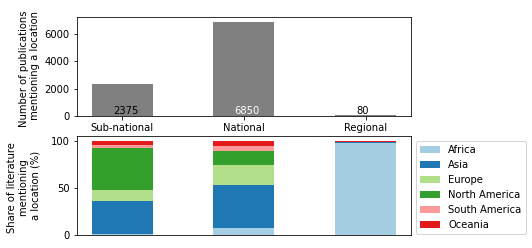

In [6]:
levels = ['sub','national','supra'] 

colors_continent = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
continents = ['Africa','Asia','Europe','North America','South America', 'Oceania']
contDict = {}
for idx, c in enumerate(continents):
    contDict[c] = colors_continent[idx]


fig, ax = plt.subplots(2,1)
ax[0].bar(['Sub-national','National','Regional'],level_counts["level_count"], width=0.5, color='grey')
ax[0].text(-0.07,200,level_counts.iloc[0].values[0])
ax[0].text(.92,200,level_counts.iloc[1].values[0], color="white")
ax[0].text(1.92,+200,level_counts.iloc[2].values[0])
ax[0].set_ylabel("Number of publications \n mentioning a location")

plt_val = level_cont_counts.loc[level_cont_counts.continent_paper == continents[0],"rel_count"]
prev_values = np.zeros(len(plt_val))
for i, cont in enumerate(continents):
    print(cont)
    plt_val = level_cont_counts.loc[level_cont_counts.continent_paper == cont,"rel_count"]
    ax[1].bar(levels, plt_val*100, 
              bottom=prev_values*100,
              label=cont,
              width=0.5,
              color=colors_continent[i]
             )
    prev_values += np.array(plt_val)
ax[1].set_yticks((0,50,100))
ax[1].set_xticks([])
ax[1].set_ylabel("Share of literature \nmentioning \na location (%)")

plt.legend(bbox_to_anchor=(1, 1))

fig.align_ylabels(ax)
#fig.savefig("figures/sub_supra.svg", bbox_inches="tight", facecolor='white', edgecolor='none')

### from where to where

In [11]:
!which python

/home/sarah/miniconda3/bin/python


In [1]:
from sankey_own import sankey_wo_fig

Text(1500, -750, 'Publication')

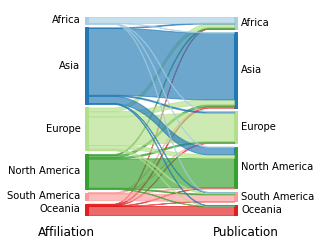

In [7]:
from sankey_own import sankey_wo_fig

print_df = df.fillna("no country")
print_df = print_df.loc[(print_df["continent_paper"]!="no country") & (print_df["continent_author"]!="no country")].copy()
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6nf']
continents = ['Africa','Asia','Europe','North America','South America', 'Oceania', 'noCount']
pd.options.display.max_rows = 8

fig, ax = plt.subplots(figsize=(3,4))
sankey_wo_fig(print_df['continent_author'], print_df['continent_paper'],
              ax=ax,
              colorDict=contDict,
              leftLabels=list(reversed(['Africa','Asia','Europe','North America','South America', 'Oceania'])),
              rightLabels=list(reversed(['Africa','Asia','Europe','North America','South America', 'Oceania'])),
              leftLabelsPlot=list(reversed(['Africa','Asia','Europe','North America','South America', 'Oceania'])),
              rightLabelsPlot=list(reversed(['Africa','Asia','Europe','North America','South America', 'Oceania'])),
              fontsize=10, #figure_name="fruit"
              closePlot=False
             )
ax.text(-600, -750,'Affiliation', size=12)
ax.text(1500, -750,'Publication', size=12)
#plt.savefig('figures/affil_country.svg', bbox_inches="tight", facecolor='white', edgecolor='none')

### Sankey diagram for countries

Text(650, -350, 'Publication')

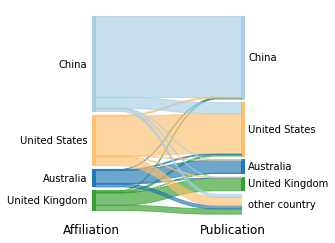

In [8]:
countries = ['China', 'United States','Australia', 'United Kingdom']
countries_otherCountry = ['China', 'United States','Australia', 'United Kingdom','other country']
countries_otherCountry_plot = ['China', 'United States','Australia', 'United Kingdom', '']



print_df_country = print_df.loc[print_df.country_author.isin(countries)]
tiny = {'id':15, 'locations_paper':['test'], 'continent_paper':['test'], 'country_paper':['other country'],
       'sub_supra_paper':['sub'], 'continent_author':['test'], 'country_author':['other country']}

print_df_country = pd.concat([print_df_country, pd.DataFrame(tiny)])

print_df_country.loc[~print_df_country.country_paper.isin(countries), "country_paper"] = "other country"
tiny = {'id':15, 'locations_paper':['test'], 'continent_paper':['test'], 'country_paper':['other country'],
       'sub_supra_paper':['sub'], 'continent_author':['test'], 'country_author':['other country']}
print_df_country = pd.concat([print_df_country, pd.DataFrame(tiny)])

colors = ['#a6cee3','#fdbf6f','#1f78b4','#33a02c','#ffffff','#b2df8a','#33a02c','#ffffff','#e31a1c','#fdbf6f','#ffffff']
country_col = {}
for i,c in enumerate(countries_otherCountry):
    country_col[c] = colors[i]

fig, ax = plt.subplots(figsize=(3,4))
sankey_wo_fig(print_df_country['country_author'], print_df_country['country_paper'],
              ax=ax,
              colorDict=country_col,
              leftLabels=list(reversed(countries_otherCountry)),
              rightLabels=list(reversed(countries_otherCountry)),
              leftLabelsPlot=list(reversed(countries_otherCountry_plot)),
              rightLabelsPlot=list(reversed(countries_otherCountry)),
              fontsize=10, #figure_name="fruit"
              #closePlot=False
             )
ax.text(-200, -350,'Affiliation', size=12)
ax.text(650, -350,'Publication', size=12)
#plt.savefig('figures/affil_country.png', bbox_inches="tight", facecolor='white', edgecolor='none')

### over/under-representation for each technology compared to rest of studies

In [9]:
df_w_locations_ids = df.id.unique()
df_w_locations = all_studies.loc[all_studies.id.isin(df_w_locations_ids)]
print(all_studies.shape)
print(df_w_locations.shape)

(37776, 3)
(13983, 3)


In [10]:
all_pubs_techs = (all_studies.groupby("all_pred_tech").size()/len(all_studies_ids)).reset_index()
all_pubs_techs = all_pubs_techs.rename(columns={0:"rel_tech_all_studies"})

w_loc_pubs_techs = (df_w_locations.groupby("all_pred_tech").size()/len(df_w_locations_ids)).reset_index()
w_loc_pubs_techs = w_loc_pubs_techs.rename(columns={0:"rel_tech_loc_studies"})

w_loc_pubs_techs = w_loc_pubs_techs.merge(all_pubs_techs, on="all_pred_tech", how="left")
w_loc_pubs_techs["diff"] = (w_loc_pubs_techs.rel_tech_loc_studies - w_loc_pubs_techs.rel_tech_all_studies)

w_loc_pubs_techs = w_loc_pubs_techs.sort_values("diff", ascending=False).reset_index()

In [11]:
tech_goodOrder = [
    "CCS",
    "BECCS",
    "DAC(CS)",
    "CCUS",
    "Soil Carbon Sequestration",
    "AR",
    "restoration of landscapes/peats",
    "Agroforestry",
    "Forest Management",
    "Biochar",
    "Enhanced Weathering (land based)",
    "Ocean alkalinity enhancement",
    "Blue Carbon",
    "Algae farming",
    "Ocean fertilization & Artificial upwelling",
    "General Literature on CDR/NET",
    "Other technologies"
    
]

exclude_technologies = ["CCS", "CCUS", "Algae farming","Other technologies",]

tech_goodOrder = [t for t in tech_goodOrder if t not in exclude_technologies]

col_ccs = [
'#e6550d',
'#fdae6b'
] # '#fc8d59','#d7301f']# oranges
#col_ccs = [
#    '#fc8d59',
#    '#e6550d',
#    '#fdae6b',
#    '#d7301f']# oranges


col_ccs.reverse() 
col_biochar =  ['#f768a1'] # violet
col_landbased = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c'] # greens
col_landbased.reverse() 
col_ew_landbased =  ['#c994c7'] # bright violet
col_ocean = ['#f1eef6','#bdc9e1','#74a9cf','#0570b0'] # blues
col_gen_other = ['#636363', '#bdbdbd'] # greys

color_tech = (
             col_ccs + 
             col_landbased +  
             col_biochar + 
             col_ew_landbased + 
             col_ocean +
             col_gen_other
)

tc = {}
for i, tech in enumerate(tech_goodOrder):
    tc[tech]=color_tech[i]


In [40]:
tc

{'BECCS': '#fdae6b',
 'DAC(CS)': '#e6550d',
 'Soil Carbon Sequestration': '#006d2c',
 'AR': '#31a354',
 'restoration of landscapes/peats': '#74c476',
 'Agroforestry': '#bae4b3',
 'Forest Management': '#edf8e9',
 'Biochar': '#f768a1',
 'Enhanced Weathering (land based)': '#c994c7',
 'Ocean alkalinity enhancement': '#f1eef6',
 'Blue Carbon': '#bdc9e1',
 'Ocean fertilization & Artificial upwelling': '#74a9cf',
 'General Literature on CDR/NET': '#0570b0'}

Text(-0.12, 14, 'compared to all publications')

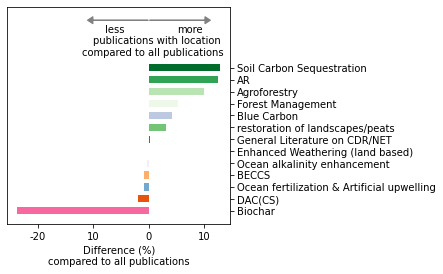

In [22]:
fig, ax4 = plt.subplots(figsize=(4,4))

width = 0.6
start_val = len(w_loc_pubs_techs)
for i, row in w_loc_pubs_techs.iterrows():
    ax4.barh([start_val-i], row["diff"], align='center', height=width, color=tc[row.all_pred_tech], zorder=10)

#ax5 = ax4.twiny()
ax4.set_yticks([i+1 for i in range(len(w_loc_pubs_techs))], w_loc_pubs_techs.all_pred_tech.to_list()[::-1])
ax4.set_xlabel("Difference (%)\ncompared to all publications")
ax4.set_xticks([-0.2,-0.1,0,0.1],[-20,10,0,10])
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position("right")



ax4.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))

plt.arrow(0.001, 17, 0.1, 0, head_width=0.6, head_length=0.01,ec="grey",fc="grey")
plt.arrow(-0.001, 17, -0.1, 0, head_width=0.6, head_length=0.01,ec="grey",fc="grey")
ax4.text(-0.08, 16, "less")
ax4.text( 0.05, 16, "more")
ax4.text(-0.1, 15, "publications with location")
ax4.text(-0.12, 14, "compared to all publications")

### Over- and Underrepresentation of all regions

In [19]:
# reusing code from different notebook for revision.
# here;
# df_ex = all studies with regional focus, one line=one tech (id can appear more than once)
df_ex = all_studies.loc[all_studies.id.isin(df.id.tolist())]
df_ex = df_ex.merge(df[["id","locations_paper","continent_paper"]])

In [20]:
# compare data for countries of special interest against all countries

all_continents_techs = (df_ex.groupby("all_pred_tech").size()/len(df_ex)).reset_index()
all_continents_techs = all_continents_techs.rename(columns={0:"rel_tech_all_continents"})

df_ex_con_norm = df_ex.groupby("continent_paper", as_index=False).size().rename(columns={"size":"paper_per_continent"})
continent_tech = df_ex.groupby(["continent_paper","all_pred_tech"], as_index=False).size()
continent_tech = continent_tech.merge(df_ex_con_norm, on="continent_paper", how="left")
continent_tech["rel_tech_one_continent"] = continent_tech["size"]/continent_tech["paper_per_continent"] 

continent_tech = continent_tech.merge(all_continents_techs[["all_pred_tech", "rel_tech_all_continents"]], on="all_pred_tech", how="left")
continent_tech["div_from_all_continents"] = continent_tech["rel_tech_one_continent"] - continent_tech["rel_tech_all_continents"]


values_plot = []
for c in continents:
    part = continent_tech.loc[continent_tech.continent_paper==c].copy()
    values_plot.append(part.sort_values("div_from_all_continents", ascending=False)[:3] )
    values_plot.append(part.sort_values("div_from_all_continents")[:3].sort_values("div_from_all_continents", ascending=False) )
    
    
values_plot = pd.concat(values_plot)

In [17]:
ls_numbers = []
ls_techs = []
for idx, c in enumerate(continents):
    part = values_plot.loc[values_plot.continent_paper==c].copy()
    for i in range(len(continents)):
        start_val = 40-(idx*6+2*idx)
        try:
            ls_numbers.append(start_val-i)
            ls_techs.append(part["all_pred_tech"].tolist()[i])
        except:
            pass

In [25]:
part

,continent_paper,all_pred_tech,size,paper_per_continent,rel_tech_one_continent,rel_tech_all_continents,div_from_all_continents
3,Africa,Biochar,219,862,0.254060,0.214832,0.039228
9,Africa,Soil Carbon Sequestration,238,862,0.276102,0.245870,0.030232
1,Africa,Agroforestry,125,862,0.145012,0.130730,0.014281
0,Africa,AR,131,862,0.151972,0.162268,-0.010296
2,Africa,BECCS,11,862,0.012761,0.030895,-0.018134
10,Africa,restoration of landscapes/peats,11,862,0.012761,0.044053,-0.031292


In [32]:
continents[:6]

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

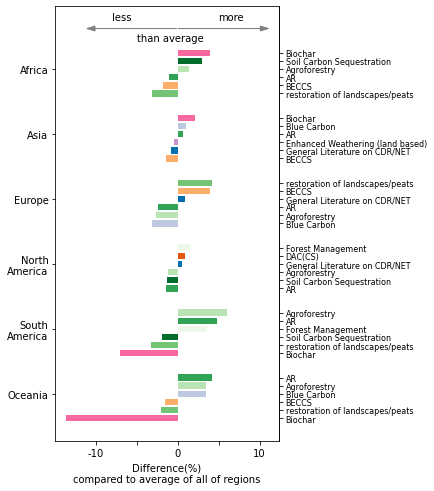

In [36]:
fig, ax = plt.subplots(figsize=(4,8))
continents = continents[:6]

ls_numbers = []
ls_techs = []
for idx, c in enumerate(continents):
    part = values_plot.loc[values_plot.continent_paper==c].copy()
    for i in range(len(continents)):
        start_val = 40-(idx*6+2*idx)
        ls_numbers.append(start_val-i)
        ls_techs.append(part["all_pred_tech"].tolist()[i])

for idx, c in enumerate(continents[:6]):
    part = values_plot.loc[values_plot.continent_paper==c].copy()
    for i in range(6):
        start_val = 40-(idx*6+2*idx)
        ax.barh([start_val-i], part["div_from_all_continents"].tolist()[i], align='center', color=tc[part["all_pred_tech"].tolist()[i]], zorder=10)
        
        
ax.set_yticks([38, 30, 22, 14, 6, -2], [c.replace(' ','\n') for c in continents])
ax.set_xticks([-0.25,-0.20,-0.15,-0.1,-0.05,0,0.05,0.1,0.15],['',-20,'',-10,'',0,'',10,''])
secay = ax.secondary_yaxis('right')
secay.set_yticks(ls_numbers,ls_techs, fontsize=8)
ax.set_xlabel("Difference(%)\ncompared to average of all of regions")

ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->"))

plt.arrow(0.001, 43, 0.1, 0, head_width=0.6, head_length=0.01,ec="grey",fc="grey")
plt.arrow(-0.001, 43, -0.1, 0, head_width=0.6, head_length=0.01,ec="grey",fc="grey")
ax.text(-0.08, 44, "less", c="black")
ax.text( 0.05, 44, "more", c="black")
ax.text(-0.05, 41.5, "than average", c="black")
fig.savefig("figures/regional_focus_location_from_paper_cb_version.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### World map with location based research

In [42]:
import geopandas
from cartopy import crs as ccrs
import cartopy

In [66]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
w = world[["name","iso_a3"]].rename(columns={"name": "country_paper", "iso_a3":"ISO3"})

centroids = pd.read_csv("data/countries_centroids.csv").rename(columns={"ISO":"ISO2"})

iso = pd.read_csv("data/iso_codes.csv")
iso["Alpha-2 code"] = iso["Alpha-2 code"].apply(lambda x: x.replace('"','').replace(' ',''))
iso["Alpha-3 code"] = iso["Alpha-3 code"].apply(lambda x: x.replace('"','').replace(' ',''))
iso.rename(columns={"Alpha-2 code":'ISO2',
                    "Alpha-3 code":'ISO3'}, inplace=True)

w = w.merge(iso[['ISO2', 'ISO3']], on="ISO3", how="left")
w = w.merge(centroids[['longitude', 'latitude', 'ISO2']], on='ISO2', how="left")

w = w.drop_duplicates(subset=["country_paper"])
w.loc[w["country_paper"]=="Côte d'Ivoire","country_paper"] = "Cote d'Ivoire"
w.loc[w["country_paper"]=="Trinidad and Tobago","country_paper"] = "Trinidad & Tobago"
w.loc[w["country_paper"]=="Czechia","country_paper"] = "Czech Republic"
w.loc[w["country_paper"]=='Dem. Rep. Congo',"country_paper"] = "Congo Democratic Republic"
w.loc[w["country_paper"]=='Brunei',"country_paper"] = "Brunei Darussalam"
w.loc[w["country_paper"]=='Congo',"country_paper"] = "Congo Brazzaville"
w.loc[w["country_paper"]=='Dominican Rep.',"country_paper"] = "Dominican Republic"
w.loc[w["country_paper"]=='United States of America',"country_paper"] = "United States"

In [68]:
counts_con

,country_paper,count,ISO3,ISO2,longitude,latitude
0,China,2294,CHN,CN,104.691139,38.073255
1,United States,1641,USA,US,-96.331617,38.820809
2,India,405,IND,IN,81.173004,23.586301
3,United Kingdom,386,GBR,GB,-2.852944,53.978447
4,Australia,340,AUS,AU,134.022772,-25.697338
...,...,...,...,...,...,...
139,Tuvalu,1,NaN,NaN,NaN,NaN
140,Gabon,1,GAB,GA,11.839411,-0.628448
141,Suriname,1,SUR,SR,-55.855514,4.098724
142,Palau,1,NaN,NaN,NaN,NaN


In [67]:
counts_con = pd.DataFrame(df.country_paper.value_counts()).reset_index()
print(sum(counts_con["count"]))
counts_con = counts_con.merge(w, on="country_paper", how="left")
print(sum(counts_con["count"]))
counts_con.drop_duplicates(inplace=True)
print(sum(counts_con["count"]))

9219
9219
9219


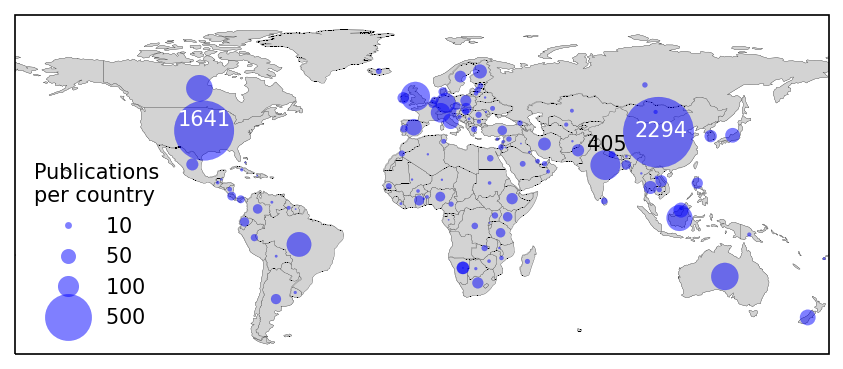

In [80]:
fig, ax = plt.subplots(dpi=150, figsize=(7,16))
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.set_aspect(aspect=1.)
ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())

ax.coastlines(lw=0.1)

usa_count = counts_con.loc[counts_con.country_paper=="United States", "count"].values[0]
uk_count = counts_con.loc[counts_con.country_paper=="United Kingdom", "count"].values[0]
china_count = counts_con.loc[counts_con.country_paper=="China", "count"].values[0]
india_count = counts_con.loc[counts_con.country_paper=="India", "count"].values[0]
   
for i, row in world.iterrows():
        ax.add_geometries(
        [row['geometry']],facecolor = 'lightgrey', 
        crs=ccrs.PlateCarree(),lw=0.1, edgecolor= "black"
    )
sc = ax.scatter(counts_con.longitude, counts_con.latitude, s=0.5*counts_con["count"], zorder=10,color="blue", alpha=0.5,lw=0.1)
ax.text(-108, 41, usa_count, c="white", zorder=15)
ax.text(94, 36, china_count, c="white", zorder=15)
ax.text(73, 30, india_count, c="black", zorder=15)
#ax.text(-12, 60, uk_count, c="black", zorder=15)

plt.legend(*sc.legend_elements("sizes", num=[10,50,100,500], c='blue'), 
           fontsize=10, loc="center left", bbox_to_anchor=(0, 0.32), frameon=False, 
           title='Publications\nper country')
fig.savefig("figures/world_map_location_title_abstract.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### Percentage of all studies with regional focus

In [12]:
df_w_locations_ids = df.id.unique()

all_studies["has_location_in_text"] = 0
all_studies.loc[all_studies.id.isin(df_w_locations_ids), "has_location_in_text"] = 1

all_studies_tech = all_studies.groupby('all_pred_tech').size()
studies_w_loc_tech = all_studies.loc[all_studies.has_location_in_text==1].groupby('all_pred_tech').size()
percentage_studies_w_location_tech = studies_w_loc_tech/all_studies_tech*100
percentage_studies_w_location_tech = percentage_studies_w_location_tech.sort_values()

In [13]:
paper = all_studies.groupby(['id','has_location_in_text']).first()
print(paper.groupby("has_location_in_text").size())
print(paper.groupby("has_location_in_text").size()/len(paper))
print(len(paper))

has_location_in_text
0    19671
1     9305
dtype: int64
has_location_in_text
0    0.678872
1    0.321128
dtype: float64
28976


In [27]:
percentage_studies_w_location_tech

all_pred_tech
Ocean alkalinity enhancement                   6.578947
DAC(CS)                                       10.097324
Ocean fertilization & Artificial upwelling    10.731707
Biochar                                       18.506654
                                                ...    
Blue Carbon                                   59.796807
Agroforestry                                  64.891729
AR                                            65.426759
Forest Management                             68.008785
Length: 13, dtype: float64

Text(0.5, 0, 'Share of location-based research \n in all scientific literature (%)')

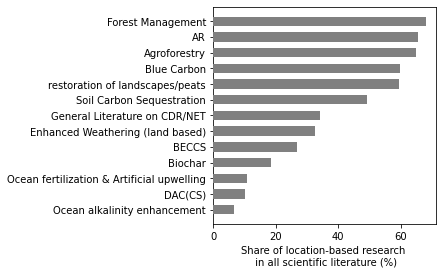

In [14]:
fig, ax = plt.subplots(figsize=(4,4))

width = 0.6
start_val = len(percentage_studies_w_location_tech)
i = 0
for ind, value in percentage_studies_w_location_tech.iteritems():
    ax.barh([i], value, height=width, color='grey', zorder=10)
    i += 1

        
ax.set_yticks([i for i in range(len(percentage_studies_w_location_tech))], percentage_studies_w_location_tech.index)
#ax.set_xticks([-0.15,-0.1,-0.05,0,0.05,0.1,0.15],['',-10,'',0,'',10,''])
ax.set_xlabel("Share of location-based research \n in all scientific literature (%)")



### All together

Africa
Asia
Europe
North America
South America
Oceania


/tmp/ipykernel_271493/2722701859.py:29: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.set_xticks([])


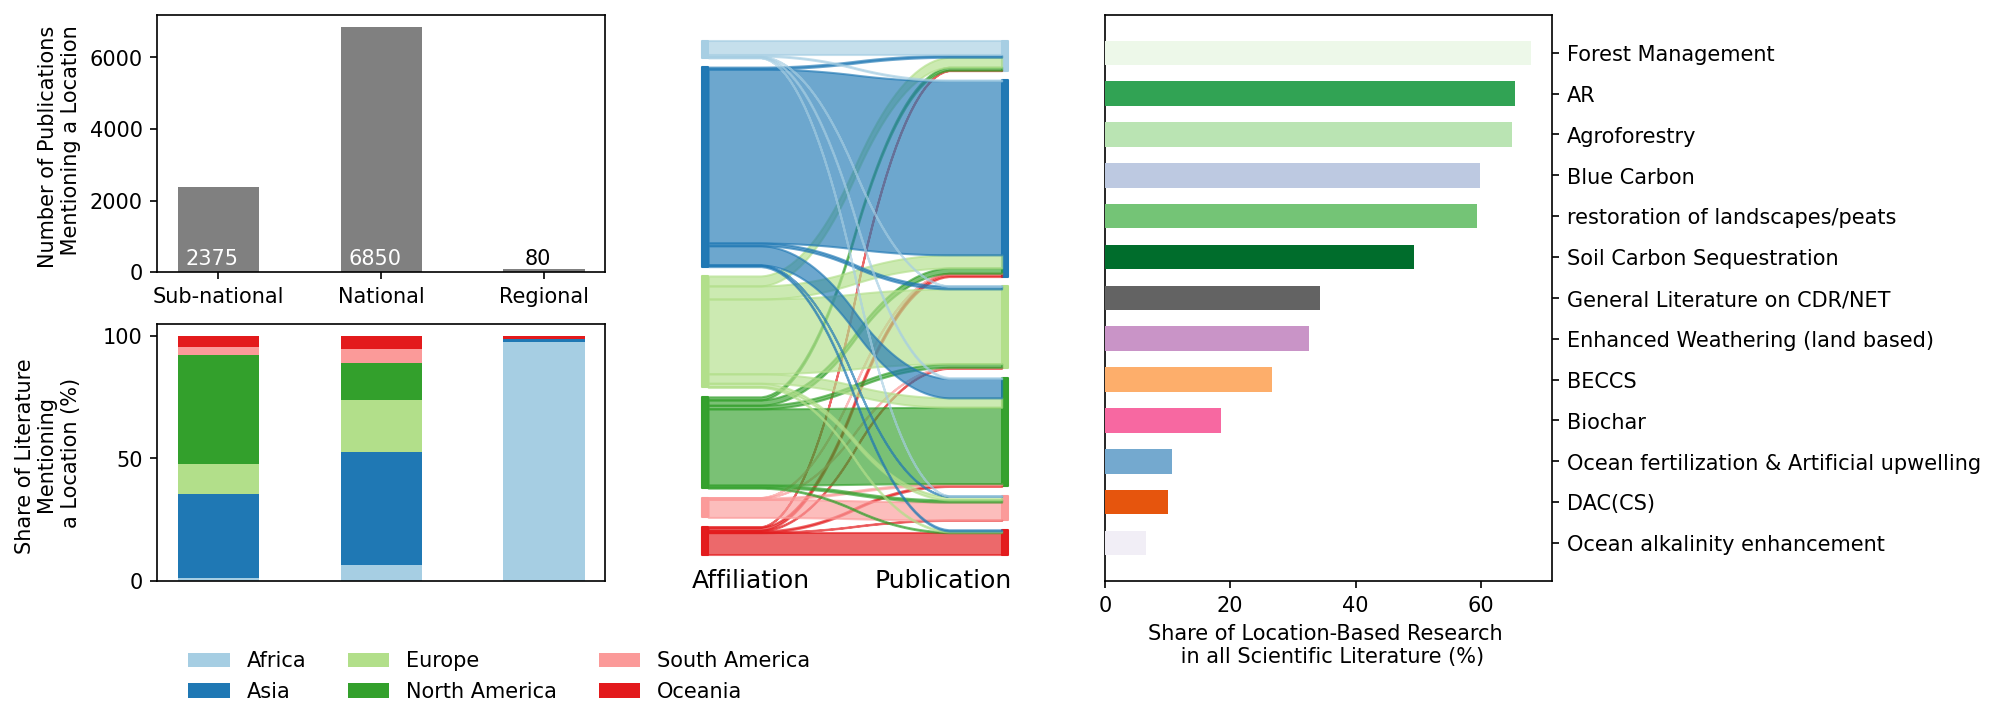

In [15]:
fig = plt.figure(figsize=(12,5), dpi=150)
gs = fig.add_gridspec(2,3,width_ratios=[4,3,4])

#### ABSOLUTE VALUES  ##########################
ax1 = fig.add_subplot(gs[0,0])
ax1.bar(['Sub-national','National','Regional'],level_counts["level_count"], width=0.5, color='grey')
ax1.text(-0.20,200,level_counts.iloc[0].values[0], color="white")
ax1.text(.80,200,level_counts.iloc[1].values[0], color="white")
ax1.text(1.88,200,level_counts.iloc[2].values[0])
ax1.set_ylabel("Number of Publications \n Mentioning a Location")

#### RELATIVE VALUES  ##########################    
ax2 = fig.add_subplot(gs[1,0])
#gs.update(left=0.99,right=1)#,top=0.965,bottom=0.03,wspace=0.3,hspace=0.09)

plt_val = level_cont_counts.loc[level_cont_counts.continent_paper == continents[0],"rel_count"]
prev_values = np.zeros(len(plt_val))
for i, cont in enumerate(continents[:-1]):
    print(cont)
    plt_val = level_cont_counts.loc[level_cont_counts.continent_paper == cont,"rel_count"]
    ax2.bar(levels, plt_val*100, 
              bottom=prev_values*100,
              label=cont,
              width=0.5,
              color=colors_continent[i]
             )
    prev_values += np.array(plt_val)
ax2.set_yticks((0,50,100))
ax2.set_xticks([])
ax2.set_ylabel("Share of Literature \nMentioning \na Location (%)")
plt.legend(bbox_to_anchor=(1.5,-0.2), ncol=3, frameon=False)
fig.align_ylabels([ax1, ax2])

#### FROM WHERE TO WHERE ###################################
ax3 = fig.add_subplot(gs[:,1])
print_df = df.fillna("no country")
print_df = print_df.loc[(print_df["continent_paper"]!="no country") & (print_df["continent_author"]!="no country")].copy()
pd.options.display.max_rows = 8

sankey_wo_fig(print_df['continent_author'], print_df['continent_paper'],
              ax=ax3,
              colorDict=contDict,
              leftLabels=list(reversed(['Africa','Asia','Europe','North America','South America', 'Oceania'])),
              rightLabels=list(reversed(['Africa','Asia','Europe','North America','South America', 'Oceania'])),
              leftLabelsPlot=(['' for i in range(len(continents[:-1]))]),
              rightLabelsPlot=(['' for i in range(len(continents[:-1]))]),
              fontsize=10, 
              closePlot=False
             )
ax3.text(-100, -450,'Affiliation', size=12)
ax3.text(1000, -450,'Publication', size=12)

#### SHARE OF ALL LITERATURE ###################################
ax4 = fig.add_subplot(gs[:,2])

width = 0.6
start_val = len(percentage_studies_w_location_tech)
i = 0
for ind, value in percentage_studies_w_location_tech.iteritems():
    ax4.barh([i], value, height=width, color=tc[ind], zorder=10)
    i += 1

        
ax4.set_yticks([i for i in range(len(percentage_studies_w_location_tech))], percentage_studies_w_location_tech.index)
ax4.yaxis.tick_right()
ax4.set_xlabel("Share of Location-Based Research \n in all Scientific Literature (%)")

fig.savefig("figures/regional_focus.png", bbox_inches="tight", facecolor='white', edgecolor='none')

### over/under-representation for each research field etc. compared to rest of studies --> SI

### Save data in Excel

In [17]:
level_cont_counts.to_excel('figures/fig_data/fig_loc_abstract__continent_sub_supra.xlsx', index=False)

In [18]:
pd.DataFrame(percentage_studies_w_location_tech).rename(columns={0: "share of location_based reserach in all lit per technology"}).to_excel('figures/fig_data/fig_loc_abstract__share_of_litWLocation.xlsx')

### Analysis for paper

In [21]:
print(df.shape[0])
print(len(all_studies_ids))

9305
28976


In [25]:
level_cont_counts.level_count.unique()/df.shape[0]

array([0.25523912, 0.73616335, 0.00859753])

In [28]:
percentage_studies_w_location_tech.head(7)

all_pred_tech
Ocean alkalinity enhancement                   6.578947
DAC(CS)                                       10.097324
Ocean fertilization & Artificial upwelling    10.731707
Biochar                                       18.506654
BECCS                                         26.716141
Enhanced Weathering (land based)              32.512315
General Literature on CDR/NET                 34.249084
dtype: float64

In [31]:
asia_origin = print_df.loc[print_df.continent_author=="Europe"]
asia_origin.groupby("continent_paper").size()/asia_origin.shape[0]

continent_paper
Africa           0.087994
Asia             0.117823
Europe           0.673378
North America    0.082028
Oceania          0.008203
South America    0.030574
dtype: float64